In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11B.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #11-B <br></center></h2>

<h1><center> Systems of ODEs<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# A system of interconnected water tanks

In this lab activity we will simulate the system shown below of three interconnected water tanks. As you can see, the tanks are numbered 1, 2, and 3, and all three are equipped with spigots for extracting water. The flow of water through the spigots are the time-varying "demands" and they are labeled $d_1$, $d_2$, and $d_3$. Tank 1 is supplied with water at a rate $s$. The tanks are connected by two pipes, one between tanks 1 and 2 which carries a flow $f_{12}$, and the other between tanks 2 and 3 with flow $f_{23}$. The height of water in the tanks are denoted with $h_1$, $h_2$, and $h_3$. All of these variables have SI units:

+ time $t$ is in seconds.
+ $h_1$, $h_2$, $h_3$ are in meters. 
+ $d_1$, $d_2$, $d_3$, $s$, $f_{12}$, and $f_{23}$ are in cubic meters per second.

Because the tanks are identical (same surface areas), the flows through the pipes depends only on the difference between the heights in the connected tanks. We assume that the flow is *proportional* to this difference:

\begin{align*} &f_{12} = \alpha_1 (h_1-h_2) \\ &f_{23} = \alpha_2 (h_2-h_3) \end{align*}

Water flows from the tank with the higher water level to the one with lower water level. The propotionality constants $\alpha_1$ and $\alpha_2$ depend on many factors, including the diameters, roughness, and lengths of the pipes. In this exercise $\alpha_1$ and $\alpha_2$ are given. 

<img src="resources/water_tanks.png" width=800>

In question 1 we will simulate the system assuming all of the spigots are closed and the water supply is turned off. Then, in question 2, we will incorporate time-varying profiles for these quantities. 

Much of the code for this lab builds upon the code you've developed in lab 11A. Hence it is recommended that you finish that lab before doing this one.  

We begin by deriving the state equation (system of ODEs) for the system.

# Question 0: Write the system of ODEs

Before we can get to the coding, we must first create a mathematical model of the system. The first step to doing this is to define the "state" of the system. In this case, the state is the three water levels $h_1$, $h_2$, and $h_3$. We arrange these into a "state vector" $\mathbf{y}$:

\begin{equation*}
\mathbf{y} = \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} 
\end{equation*}

Next, we must write the *state equation*, which is a system of ODEs:
\begin{align*}
&h'_1 =  f_1(h_1,h_2,h_3,s, d_1, d_2, d_3) \\
&h'_2 =  f_2(h_1,h_2,h_3,s, d_1, d_2, d_3) \\
&h'_3 =  f_3(h_1,h_2,h_3,s, d_1, d_2, d_3) 
\end{align*}
These equations relate the rate of change of each of the heights (e.g. $h'_1$) to all of the states and all of the  demands and supplies. 

Let's derive the formula for $h'_1$. The principle of conservation of mass combined with the incompressibility of water tells us the that rate of change of the volume of water in the tank equals the net flow of water into the tank. 
\begin{equation*}
\frac{d}{dt}(\text{volume of water in the tank}) = \text{flow in} - \text{flow out}
\end{equation*}
The volume is the circular area of the tank $a$ (assumed equal for all tanks) times the height. Since $a$ is constant we have for tank 1:
\begin{equation*}
a \: h_1' = s-f_{12}- d_1 
\end{equation*}
On the right hand side, $s$ is the flow entering the tank and $f_{12}$ and $d_1$ are flows that exit. Next we must replace $f_{12}$ with its expression in terms of the states: $f_{12} = \alpha_1 (h_1-h_2)$. Dividing by $a$ we get
\begin{equation*}
h'_1 = \frac{1}{a}\Bigl(-\alpha_1 (h_1-h_2)+  s- d_1\Bigr)
\end{equation*}

Try to derive the other two state equations (for $h'_2$ and $h'_3$) on your own. Once you do that you will notice that they are all *linear* functions of the parameters. Hence the vector form of the state equation is a matrix multiplication:
\begin{equation*}
\mathbf{y}' =  A\: \mathbf{y}  + \mathbf{w} 
\end{equation*}
where $A$ is a 3x3 matrix and $\mathbf{w}$ is a 3x1 column vector. The entries of $A$ depend on $\alpha_1$, $\alpha_2$, and $a$. The entries of $\mathbf{w}$ depend on the supplies, the demands, and $a$. From the formula just derived for $h'_1$ we can see that the first row of $A$ is $[-\alpha_1/a,\alpha_1/a,0]$, while the first row of $\mathbf{w}$ is the scalar $(s-d_1)/a$. You should complete rows two and three of $A$ and $\mathbf{w}$.



# Question 1: Simulation with no supply or demand

## Question 1.1: State equation

With the supply turned off ($s=0$) and all of the spigots closed ($d_1=d_2=d_3=0$), we get $w=\mathbf{0}$, and the vector state equation reduces to:
\begin{equation*}
\mathbf{y}' = A\:\mathbf{y}
\end{equation*}
Define a function called `three_tanks_closed(y,t,params)` that implements this state equation. The inputs to this function are:
+ `y`: a 1D Numpy array containing the current value of the state `np.array([h1,h2,h3])`
+ `t`: the current time in seconds. Note that `t` is not used, but we include it in order to create a consistent signature for later parts. 
+ `params`: a tuple containing the constant parameters of the state equation: `params=(alpha1,alpha2,a)`.

**Note:** 
+ The "closed" in the name of the function means that the supply and demand valves are closed.  

In [3]:
def three_tanks_closed(y,t,params):

    # unpack params into alpha1, alpha2, and a
    alpha1, alpha2, a = params

    # Define A as a 2D numpy array
    A = ([-alpha1/a,alpha1/a,0],
         [alpha1/a,-alpha1/a-alpha2/a,alpha2/a],
         [0,alpha2/a,-alpha2/a])

    # Return the matrix multiplication of A and y
    return A @ y

In [4]:
# Test your code
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
y = np.array([3,2,0])           # m
t=0                             # s
three_tanks_closed(y,t,params)

array([-0.001     , -0.00033333,  0.00133333])

In [5]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Multi-variable IVP solver

Next we will implement a generic solver for vector-valued initial value problems. This process is almost identical to what you did in part 2.1 of lab 11A. 

Recall that the general update formula for the numerical method is:

\begin{equation*}
\hat{\mathbf{y}}[k+1] = \hat{\mathbf{y}}[k] + h\: \hat{\mathbf{s}}_k
\end{equation*}

In contrast with lab 11A, here $\hat{\mathbf{y}}[k]$ is a *vector* in $\mathbb{R}^n$, where $n$ is the number of states (in this case 3). The estimate of the slope $\hat{\mathbf{s}}_k$ is also a vector in $\mathbb{R}^n$. As in lab 11A, the computation of $\hat{\mathbf{s}}_k$ is determined by the numerical method being used. Here we will test two options --  Euler's method and Runge-Kutta 4 (RK4). But first we must implement the generic update formula.

Write a function called `my_ivp_solver_closed(f,ts,h,y0,shat_estimator,params)`, whose inputs are:

+ `f` : A *function* that evaluates the state equation.
+ `ts`: Total simulation time [seconds] 
+ `h` : Time step [seconds] 
+ `y0` : Initial condition. This is a 1D NumPy array with $n$ elements.
+ `shat_estimator(f,yhatk,h,t,params)`: A *function* that evaluates $\hat{\mathbf{s}}_k$ for a particular numerical method. Notice that the function takes the `params` tuple as input.


**Hint**
+ As in 11A, the input and output characteristics of `f` are not important at this stage, since that function will simply be passed in to `shat_estimator`.

You should be able to copy your code from part 2.1 of lab 11A, and make a few adjustments:
+ `yhat` will now be a 2D NumPy array with shape `(K,n)`, where `K` is the number of time instants. Hence you should replace instances of `yhat[k]` with `yhat[k,:]`, for example. 
+ If you encounter errors, remember to debug by a) inserting print statements in the code, and/or b) if using VSCode, insert breakpoints and run in [debug mode](https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_debug-a-jupyter-notebook). 

In [6]:
def my_ivp_solver_closed(f,ts,h,y0,shat_estimator,params):

    # Obtain n as the number of elements in y0
    n = len(y0)

    # Create the time grid 
    tvec = np.arange(0,ts,h)
    K = len(tvec)

    # Initialize the yhat array (allocate space and set the initial condition)
    yhat = np.empty((K,n))
    yhat[0,:] = y0
    # Run the iteration forward over all time.
    # At each step: 
    # 1. use shat_estimator to compute shat
    # 2. use it to compute the next value of yhat 
    for k in np.arange(0,K-1):
    
        # current time
        t = tvec[k]
        
        # call the shat estimator to obtain shat
        shat = shat_estimator(f,yhat[k,:],h,t,params)

        # update yhat
        yhat[k+1,:] = yhat[k,:] + h * shat

    return tvec, yhat

In [7]:
# Test your code
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
y0 = np.array([3,2,0])          # m
ts = 10                         # s
h = 1                           # s

def shat_estimator_fake(f,yhatk,h,t,params):
    return 0.5

def state_equation_fake(y,t,params):
    return None

tvec, yhat = my_ivp_solver_closed(state_equation_fake,ts,h,y0,shat_estimator_fake,params)

In [8]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3: Euler's method

Implement Euler's method for estimating $\hat{\mathbf{s}}_k$:
\begin{equation*}
\hat{\mathbf{s}}_k = f(\hat{\mathbf{y}}[k],t)
\end{equation*}

The code for this part is identical to part 2.2 of lab 11A, except that the function now receives `params` as an additional input and passes it on to the state equation `f(yhatk,t,params)`. 

In [9]:
def shat_euler_closed(f,yhatk,h,t,params):
    shat = f(yhatk,t,params)
    return shat

In [10]:
# Test your code.
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
yhatk = np.array([3,2,0])       # m
t = 0                           # s
h = 1                           # s

def state_equation_fake(y,t,params):
    return 1

shat_euler_closed(state_equation_fake,yhatk,h,t,params)

1

In [11]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Question 1.4: RK4

Implement the formula for RK4. Recall the formula:
\begin{align*}
&k_1 = f\Bigl(\hat{\mathbf{y}}[k],t\Bigr)\\
&k_2 = f\Bigl(\hat{\mathbf{y}}[k] + \frac{h}{2} k_1\:,\:t \!+\! \frac{h}{2}\Bigr) \\
&k_3 = f\Bigl(\hat{\mathbf{y}}[k] + \frac{h}{2} k_2\:,\:t \!+\! \frac{h}{2}\Bigr) \\
&k_4 = f\Bigl(\hat{\mathbf{y}}[k] + h k_3\:,\:t \!+\! h\Bigr) \\
&\hat{\mathbf{s}}_k = \frac{1}{6} \Bigl(k_1+2k_2+2k_3+k_4\Bigr)
\end{align*}
The instructions for question 1.3 apply here as well. 

**Note:** 
+ Each of $k_1$ through $k_4$ are *vectors*, or more precisely, 1D NumPy arrays with three elements.

In [12]:
def shat_rk4_closed(f,yhatk,h,t,params):
    k1 = f(yhatk,t,params)
    k2 = f(yhatk+(h/2)*k1,t+h/2,params)
    k3 = f(yhatk+(h/2)*k2,t+h/2,params)
    k4 = f(yhatk+(h*k3),t+h,params)
    shat = (1/6)*(k1+2*k2+2*k3+k4)
    return shat

In [13]:
# Test your code.
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
yhatk = np.array([3,2,0])       # m
t = 0                           # s
h = 1                           # s

def state_equation_fake(y,t,params):
    return 0.5*y

shat_rk4_closed(state_equation_fake,yhatk,h,t,params)

array([1.9453125, 1.296875 , 0.       ])

In [14]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Question 1.5: Run it

We have finished putting together all of the necessary pieces to simulate the isolated three tank system using Euler's method and RK4. Run the simulation with these settings:
+ Initial condition: $h_1(0)=5$, $h_2(0)=0$, $h_3(0)=2$.
+ Simulation time `ts`: 2 hours
+ Time step `h`: 1 minute
+ $\alpha_1 = 1/100$
+ $\alpha_2 = 1/150$
+ $a = 10$

Store the time vector and state trajectory for Euler's method as `tvec_euler` and `yhat_euler`.

Store the time vector and state trajectory for RK4 as `tvec_rk4` and `yhat_rk4`.


In [15]:
y0 = np.array([5,0,2])
ts = 7200
h = 60
alpha1 = 1/100
alpha2 = 1/150
a = 10
tvec_euler, yhat_euler = my_ivp_solver_closed(three_tanks_closed,ts,h,y0,shat_euler_closed,params)
tvec_rk4, yhat_rk4 = my_ivp_solver_closed(three_tanks_closed,ts,h,y0,shat_rk4_closed,params)

In [16]:
grader.check("q1p5")

q1p5 results: All test cases passed!

## Plots!

### Time series plot

Run the cell to see the change in the water levels of the three tanks through time. Does this result agree with what you expect would happen with the interconnected tanks?

Text(0, 0.5, 'height [meters]')

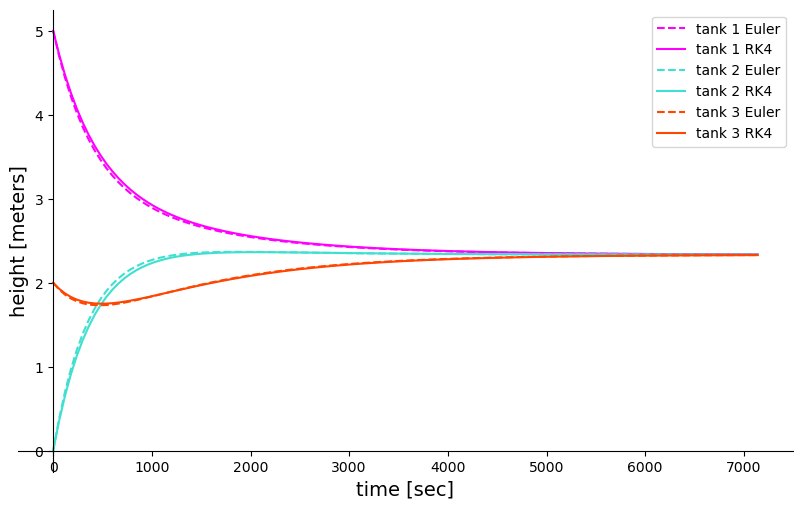

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tvec_euler,yhat_euler[:,0],
        linestyle='--',
        color = 'magenta',
        label='tank 1 Euler')
ax.plot(tvec_rk4,yhat_rk4[:,0],
        color = 'magenta',
        label='tank 1 RK4')
ax.plot(tvec_euler,yhat_euler[:,1],
        linestyle='--',
        color = 'turquoise',
        label='tank 2 Euler')
ax.plot(tvec_rk4,yhat_rk4[:,1],
        color = 'turquoise',
        label='tank 2 RK4')
ax.plot(tvec_euler,yhat_euler[:,2],
        linestyle='--',
        color = 'orangered',
        label='tank 3 Euler')
ax.plot(tvec_rk4,yhat_rk4[:,2],
        color = 'orangered',
        label='tank 3 RK4')

ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_position('zero')
ax.legend(loc='upper right')
ax.set_xlabel('time [sec]')
ax.set_xlabel('height [meters]')
ax.set_xlabel('time [sec]',fontsize=14)
ax.set_ylabel('height [meters]',fontsize=14)

### Total water level

We expect that the total amount of water in the system will remain constant through time, since no water enters nor exits. Run the next cell to see whether this is intuition is validated by the two simulations.

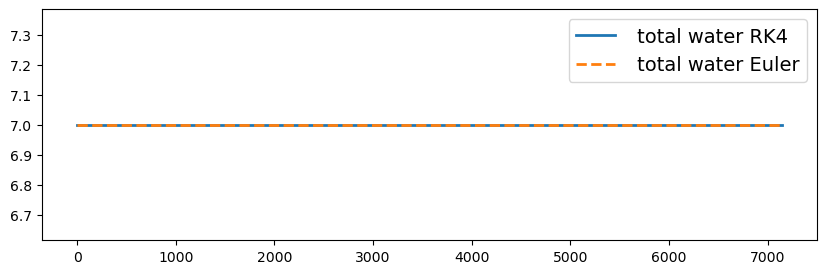

In [18]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(tvec_rk4,np.sum(yhat_rk4,axis=1),
        linestyle='-',
        linewidth=2,
        label=' total water RK4')
ax.plot(tvec_euler,np.sum(yhat_euler,axis=1),
        linestyle='--',
        linewidth=2,
        label=' total water Euler')
ax.legend(fontsize=14);

### State trajectory

The next cell shows the trajectory followed by the state vector through $\mathbb{R}^3$. The green dot is the initial state at $(0,7,5)$, the red dot is the final state near $(4,4,4)$.

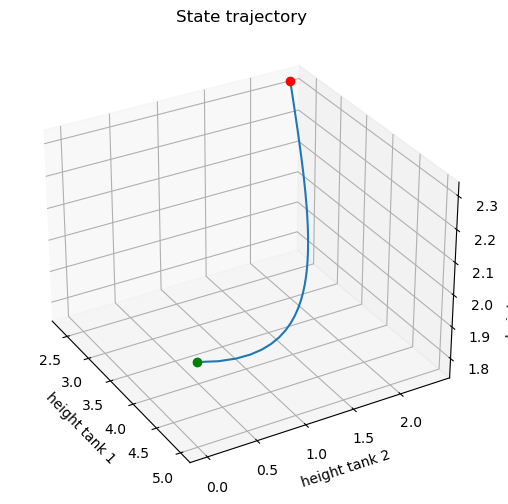

In [19]:
# %matplotlib widget
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot(yhat_rk4[:,0],yhat_rk4[:,1],yhat_rk4[:,2])
ax.plot(yhat_rk4[0,0],yhat_rk4[0,1],yhat_rk4[0,2],'go')
ax.plot(yhat_rk4[-1,0],yhat_rk4[-1,1],yhat_rk4[-1,2],'ro')
ax.set_xlabel('height tank 1')
ax.set_ylabel('height tank 2')
ax.set_zlabel('height tank 3')
ax.set_title('State trajectory')
ax.view_init(elev=30, azim=-30)

# Question 2: Simulation with non-zero supply and demand

Recall the full state equation in vector form:
\begin{equation*}
\mathbf{y}' =  A\: \mathbf{y}  + \mathbf{w} 
\end{equation*}

So far we have simulated the system with the input and output valves shut off. That is, with $\mathbf{w}=\mathbf{0}$. In this part we allow a time-varying suppy $s(t)$ to enter the system, and time-varying demands $d_1(t)$, $d_2(t)$, and $d_3(t)$ to be extracted. You've already derived the conversion from these values to $\mathbf{w}$ in Question 0.  

In the terminology of dynamical system, such state-independent inputs are known as "disturbances". To simulate the disturbances we will have to modify the functions from Question 1 by adding the variable `dist`, which is a tuple containing the values of $s(t)$, $d_1(t)$, $d_2(t)$, and $d_3(t)$ at some particular time. These adjustments will be made in parts 2.2 through 2.4. Then in part 2.5 we will define the supply and demand profiles. But first we will check your derivation of $\mathbf{w}$ as a function of the supplies and demands.

## Question 2.1: Check $\mathbf{w}$

Write a function called `get_w(params,dist)` that takes the tuple `dist=(s,d1,d2,d3)` of instantaneous (i.e. scalar) values of the supply $s$ and the three demands $d_1$, $d_2$, and $d_3$. This function should return a 1D NumPy array with the corresponding value of $\mathbf{w}$.

In [20]:
def get_w(params,dist):
    s, d1, d2 ,d3 = dist
    w = np.array([(s-d1)/a,-d2/a,-d3/a])
    return w

In [21]:
# Test your code
params = (1/100,1/150,10)
s = 1
d1 = 2
d2 = 3
d3 = 4
dist = (s,d1,d2,d3)
get_w(params,dist)

array([-0.1, -0.3, -0.4])

In [22]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2: New state equation

Write a function called `three_tanks_open(y,t,params,dist)` that computes the right-hand side of the full state equation $\mathbf{y}' = A \mathbf{y}+\mathbf{w}$. This function is almost identical to the one from part 1.1, but it takes the `dist` tuple as an additional input, and uses it to compute $\mathbf{w}$.

In [27]:
params = (1 / 100, 1 / 150, 10)
y = np.array([3, 2, 0])
t = 0
dist = (0.15, 0.05, 0.05, 0.05)
yprime = three_tanks_open(y, t, params, dist)


False

In [38]:
def three_tanks_open(y,t,params,dist):

    # unpack params into alpha1, alpha2, a
    alpha1, alpha2, a = params
    
    # Define A as a 2D numpy array
    A = ([-alpha1/a,alpha1/a,0],
         [alpha1/a,-alpha1/a-alpha2/a,alpha2/a],
         [0,alpha2/a,-alpha2/a])

    # get w with dist
    w = get_w(params,dist)

    # Return Ay+w
    return (A@y) + w

In [39]:
# Test you code
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
y = np.array([3,2,0])           # m
t=0                             # s

s = 0.15
d1 = 0.05
d2 = 0.05
d3 = 0.05
dist=(s,d1,d2,d3)

three_tanks_open(y,t,params,dist)

array([ 0.009     , -0.00533333, -0.00366667])

In [40]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3: New IVP solver

Implement an IVP solver for the system with supply and demands.

Write the function `my_ivp_solver_open(f,ts,h,y0,shat_estimator,params,sfun,d1fun,d2fun,d3fun)` that takes the same inputs as the closed version (part 1.2), and four additional inputs: `sfun`, `d1fun`, `d2fun`, and `d3fun`. These additional inputs are *functions* of time $t$ that return the values of the supply $s(t)$ and the three demands $d_1(t)$, $d_2(t)$, and $d_3(t)$. We will write these functions later in part 2.5. For now, you only need to know that these functions take a value of time in seconds, and they return a value of flow in cubic meters per second. e.g. `s=sfun(t)`.

The `shat_estimator` function in this part takes the following input arguments: `shat_estimator(f,yhatk,h,t,params,dist)`. Note that this is a new version that takes `dist` as its last input argument. `dist` is the tuple that will ultimately be used by `get_w`, and which contains the supply and demand values. Within `my_ivp_solver_open` you will evaluate the supply and demand functions (e.g. `s=sfun(t)`) and then package the result in `dist`, i.e. `dist=(s,d1,d2,d3)`.       

`my_ivp_solver_open` should return `tvec` and `yhat`, just as in part 1.2.

In [41]:
def my_ivp_solver_open(f,ts,h,y0,shat_estimator,params,sfun,d1fun,d2fun,d3fun):

    # Obtain n as the number of elements in y0
    n = len(y0)

    # Create the time grid 
    tvec = np.arange(0,ts,h)
    K = len(tvec)

    # Initialize the yhat array (allocate space and set the initial condition)
    yhat = np.empty((K,n))
    yhat[0,:] = y0

    # Run the iteration forward over all time.
    # At each step: 
    # 1. use shat_estimator to compute shat
    # 2. use it to compute the next value of yhat 
    for k in np.arange(0,K-1):
        t = h*k
        
        # compute s, d1, d2, and d3 using the respective functions, and package into the tuple `dist`
        s = sfun(t)
        d1 = d1fun(t)
        d2 = d2fun(t)
        d3 = d3fun(t)
        dist = (s, d1 ,d2 ,d3)
        # call the shat estimator to obtain shat
        shat = shat_estimator(f,yhat[k,:],h,t,params,dist)

        # update yhat
        yhat[k+1,:] = yhat[k,:] + h * shat

    return tvec, yhat

In [42]:
# Test your code
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
y0 = np.array([3,2,0])          # m
ts = 10                         # s
h = 1                           # s

def shat_estimator_fake(f,yhatk,h,t,params,dist):
    return f(yhatk,t,params,dist)

def state_equation_fake(y,t,params,dist):
    return 0.1*y

def sfun_fake(t):
    return 0.015

def d1fun_fake(t):
    return 0.005

def d2fun_fake(t):
    return 0.005

def d3fun_fake(t):
    return 0.005

tvec, yhat = my_ivp_solver_open(state_equation_fake,
                                ts,h,y0,shat_estimator_fake,params,
                                sfun_fake,
                                d1fun_fake,
                                d2fun_fake,
                                d3fun_fake)
tvec, yhat

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[3.        , 2.        , 0.        ],
        [3.3       , 2.2       , 0.        ],
        [3.63      , 2.42      , 0.        ],
        [3.993     , 2.662     , 0.        ],
        [4.3923    , 2.9282    , 0.        ],
        [4.83153   , 3.22102   , 0.        ],
        [5.314683  , 3.543122  , 0.        ],
        [5.8461513 , 3.8974342 , 0.        ],
        [6.43076643, 4.28717762, 0.        ],
        [7.07384307, 4.71589538, 0.        ]]))

In [43]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Question 2.4: New RK4 

Modify the implementation of RK4 from part 1.4 to accept the `dist` tuple and pass it on to the state equation `f`, which will have the same signature as
`three_tanks_open`.

In [49]:
def shat_rk4_open(f,yhatk,h,t,params,dist):
    k1 = f(yhatk,t,params,dist)
    k2 = f(yhatk+(h/2)*k1,t+h/2,params,dist)
    k3 = f(yhatk+(h/2)*k2,t+h/2,params,dist)
    k4 = f(yhatk+(h*k3),t+h,params,dist)
    shat = (1/6)*(k1+2*k2+2*k3+k4)
    return shat

In [50]:
# Test your code.
alpha1 = 1/100                  # m^2/s
alpha2 = 1/150                  # m^2/s
a = 10                          # m^2
params = (alpha1,alpha2,a)
yhatk = np.array([3,2,0])       # m
t = 0                           # s
h = 1                           # s

def state_equation_fake(y,t,params,dist):
    return 0.1*y

shat = shat_rk4_open(state_equation_fake,yhatk,h,t,params,dist)
shat

array([0.3155125 , 0.21034167, 0.        ])

In [51]:
grader.check("q2p4")

q2p4 results: All test cases passed!

## Question 2.5: Supply and demand functions

<img src="resources/source_demands.png" width=800>

Write the functions `sfun(t)`, `d1fun(t)`, `d2fun(t)`, and `d3fun(t)` that produce the supply and demand profiles shown in the figure above.

+ `sfun(t)`: The inlet valve for tank 1 is opened for 3 minutes (180 seconds) every 10 minutes.  When the valve is open, $s(t)=0.02\; m^3/s$. The valve is shut off an instant before the 3-minute mark, so that, for example $s(179)=0.02$ and $s(180)=0$. More generally, $s(179+600n)=0.02$ and $s(180+600n)=0$ for any integer $n$.
+ `d1fun(t)`: $d_1(t)$ follows a sinusoidal pattern with minimum value of $0\; m^3/s$, a maximum value of $0.01\; m^3/s$, and a period of 1000 seconds. 
+ `d2fun(t)`: $d_2(t)$ is set to a constant value of $0.005\; m^3/s$ for the first 10 minutes, and is then shut off. The shutting off is such that $d_2(600)=0\; m^3/s$.
+ `d3fun(t)`: $d_3(t)$ is held at $0.001 m^3/s$ for the first 15 minutes, and then increased to $0.01\; m^3/s$. The change is such that $d_3(900)=0.01\; m^3/s$


In [58]:
def sfun(t):
    if t % 600 < 180:
        return 0.02
    else:
        return 0 

def d1fun(t):
    wave = 0.005*np.sin((2*np.pi*t)/1000)+0.005
    return min(0.01, max(0,wave))


def d2fun(t):
    if t < 600:
        return 0.005
    else:
        return 0

def d3fun(t):
    if t < 900:
        return 0.001
    else:
        return 0.01

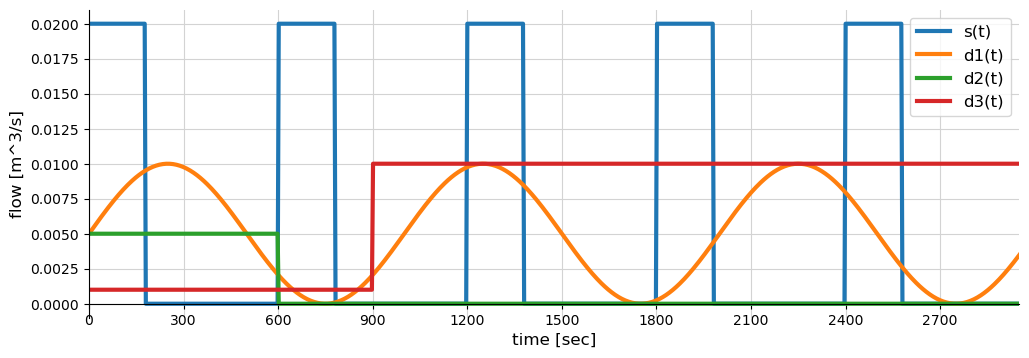

In [59]:
# Test your code

t = np.linspace(0,3600,1000)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t,[sfun(tt) for tt in t],linewidth=3,label='s(t)')
ax.plot(t,[d1fun(tt) for tt in t],linewidth=3,label='d1(t)')
ax.plot(t,[d2fun(tt) for tt in t],linewidth=3,label='d2(t)')
ax.plot(t,[d3fun(tt) for tt in t],linewidth=3,label='d3(t)')
ax.legend(fontsize=12)
ax.set_xticks(np.arange(0,3600,300))
ax.set_xlim(0,2950)
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_position('zero')
ax.set_xlabel('time [sec]',fontsize=12)
ax.set_ylabel('flow [m^3/s]',fontsize=12)
ax.grid(color='lightgray')

In [60]:
grader.check("q2p5")

q2p5 results: All test cases passed!

## Question 2.6: Run and plot

We are now ready to run a simulation of the 3-tank system with the supply and demand profiles defined in the previous part. Use the same settings as in question 1.5:

+ Initial condition: $h_1(0)=5$, $h_2(0)=0$, $h_3(0)=2$.
+ Simulation time `ts`: 2 hours
+ Time step `h`: 1 minute
+ $\alpha_1 = 1/100$
+ $\alpha_2 = 1/150$
+ $a = 10$

This time we will run the simulation using RK4 only (no Euler). Store the resulting time vector and state trajectory as `tvec_open` and `yhat_open`.

**Note:**

+ Use the plotting cells at the end of the notebook to check your results. The time series should look like this:

<img src="resources/water_tanks_open.png" width=600>

In [ ]:
y0 = np.array([5,0,2])
ts = 7200
h = 60
alpha1 = 1/100
alpha2 = 1/150
a = 10
tvec_euler, yhat_euler = my_ivp_solver_closed(three_tanks_closed,ts,h,y0,shat_euler_closed,params)
tvec_rk4, yhat_rk4 = my_ivp_solver_closed(three_tanks_closed,ts,h,y0,shat_rk4_closed,params)

In [63]:
f = three_tanks_open

y0 = np.array([5,0,2])
ts = 7200
h = 60
alpha1 = 1/100
alpha2 = 1/150
a = 10
params = (alpha1, alpha2, a)

tvec_open, yhat_open = my_ivp_solver_open(f,ts,h,y0,shat_rk4_open,params,sfun,d1fun,d2fun,d3fun)


In [64]:
grader.check("q2p6")

q2p6 results: All test cases passed!

## Plots!

### Time series plot

Run the cell to see the change in the water levels of the three tanks through time. Does this result agree with what you expect would happen with the interconnected tanks?

Text(0, 0.5, 'height [meters]')

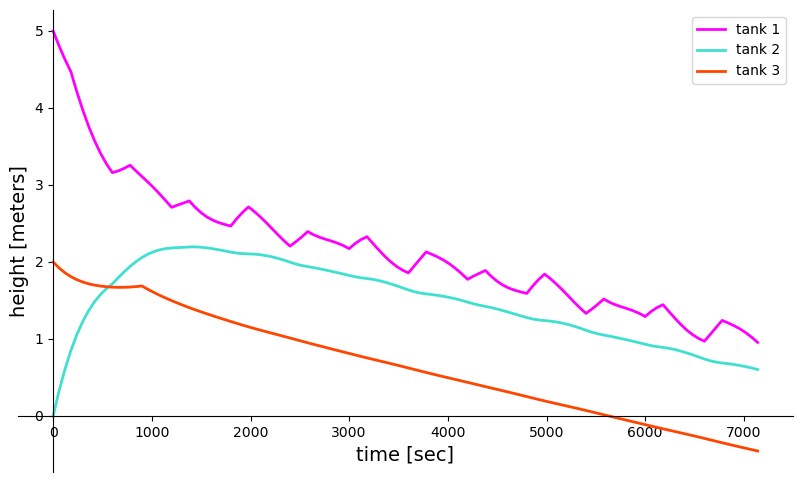

In [65]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tvec_open,yhat_open[:,0],
        color = 'magenta',
        linewidth=2,
        label='tank 1')

ax.plot(tvec_open,yhat_open[:,1],
        color = 'turquoise',
        linewidth=2,
        label='tank 2')

ax.plot(tvec_open,yhat_open[:,2],
        color = 'orangered',
        linewidth=2,
        label='tank 3')

ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_position('zero')
ax.legend(loc='upper right')
ax.set_xlabel('time [sec]',fontsize=14)
ax.set_ylabel('height [meters]',fontsize=14)

### State trajectory

The next cell shows the trajectory followed by the state vector through $\mathbb{R}^3$. The green dot is the initial state, the red dot is the final state. Uncomment `%matplotlib widget` if you want to rotate the plot, but remember to comment it out again before submitting.

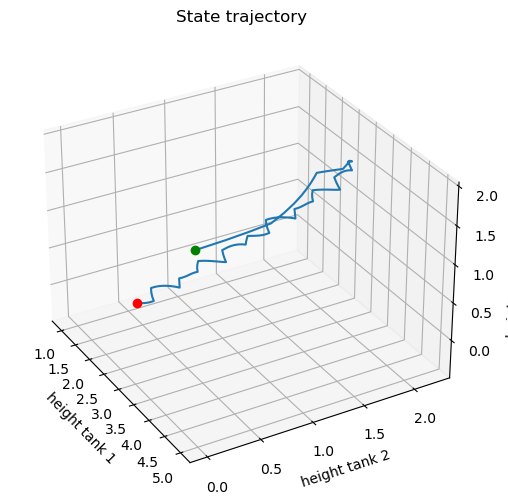

In [66]:
# %matplotlib widget
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot(yhat_open[:,0],yhat_open[:,1],yhat_open[:,2])
ax.plot(yhat_open[0,0],yhat_open[0,1],yhat_open[0,2],'go')
ax.plot(yhat_open[-1,0],yhat_open[-1,1],yhat_open[-1,2],'ro')
ax.set_xlabel('height tank 1')
ax.set_ylabel('height tank 2')
ax.set_zlabel('height tank 3')
ax.set_title('State trajectory')
ax.view_init(elev=30, azim=-30)

### Closing remark

In this lab we have used a *linear* model ($\mathbf{y}'=A\mathbf{y}+\mathbf{w}$) to simulate a system of three interconnected tanks. Linear models are great because of their simplicity, which enables many useful analyses. For example, we can use a linear model to design a feedback control algorithm to more effectively balance the water levels in the tanks using pumps. We can also use the linear model to infer the true heights from noisy measurements. Of course, we can also do both of these things with nonlinear models, but it is more difficult. 

Here though, we have encountered a significant limitation of the linear model: it predicts a *negative* water level for tank 3 after about 5800 seconds. There is no way to avoid this problem without introducing non-linearities. Introducing nonlinearity is not necessarily a problem for the numerical method; RK4 works just fine with (mildly) nonlinear ODEs.

What modifications might be made to the three-tank model so that it more realistically captures the fact that water levels can never go negative?

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [67]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q1p5 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q2p3 results: All test cases passed!

q2p4 results: All test cases passed!

q2p5 results: All test cases passed!

q2p6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)